### Logistic Regression

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting the data 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics



%matplotlib inline

In [4]:
# Input data files are available in the "data/Titanic1/" directory.
# read the train data in data DataFrame
titanic_path = 'datasets_963_1756_titanic_data.csv'
train_data = pd.read_csv(titanic_path)
#read the test data
#test_data = pd.read_csv('C:/Users/Bala/Desktop/ds/test.csv') 

In [5]:
train_data.head()  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print(train_data.shape) 

(891, 12)


In [7]:
train_data.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_data.isnull().sum()  

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
(train_data['Age'].isnull().sum()/train_data.shape[0])*100

0.0

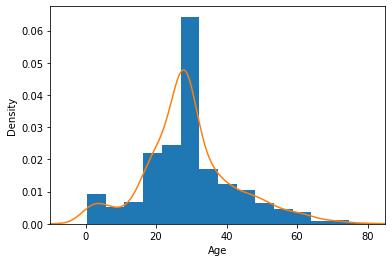

In [29]:
ax = train_data["Age"].hist(bins=15, density=True, stacked=True)
train_data["Age"].plot(kind='density')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [35]:
print('The mean age is %.2f' %(train_data["Age"].mean(skipna=True)))
print('The median age is %.2f' %(train_data["Age"].median(skipna=True)))

The mean age is 29.36
The median age is 28.00


In [36]:
(train_data['Cabin'].isnull().sum()/train_data.shape[0])*100

0.0

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown,S = Southampton):
S    646
C    168
Q     77
Name: Embarked, dtype: int64


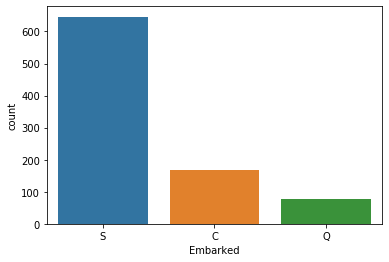

In [38]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown,S = Southampton):')
print(train_data['Embarked'].value_counts())
sns.countplot(x='Embarked', data=train_data)
plt.show()

In [14]:
#fill the NaN value
#train_data['Age'].fillna(train_data['Age'].median(),inplace=True)
train_data.Cabin.fillna('U',inplace=True)
train_data.Embarked.fillna('S',inplace=True)
train_data.Age.fillna(train_data.Age.median(), inplace=True)

In [15]:
train_data.isnull().sum()  #Data not having any NaNs

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

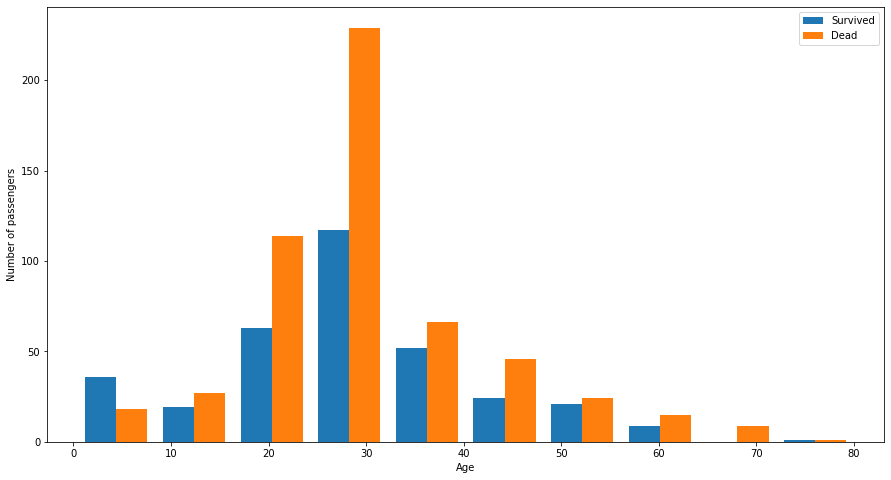

In [39]:
figure = plt.figure(figsize=(15,8))
plt.hist([train_data[train_data['Survived']==1]['Age'],
          train_data[train_data['Survived']==0]['Age']],
         bins = 10,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

             0    1  total
1st class   80  136    216
2nd class   97   87    184
3rd class  372  119    491


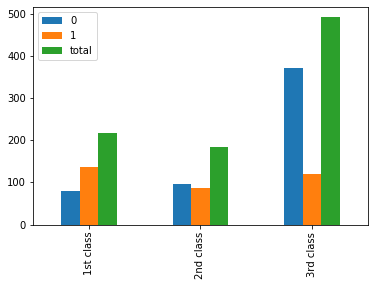

In [17]:
survived_1 = train_data[train_data['Pclass']==1]['Survived'].value_counts()
survived_2 = train_data[train_data['Pclass']==2]['Survived'].value_counts()
survived_3 = train_data[train_data['Pclass']==3]['Survived'].value_counts()
df = pd.DataFrame([survived_1,survived_2,survived_3])
df['total']=df[0]+df[1]
df.index = ['1st class','2nd class','3rd class']
df.rename(index=str,columns={1:'Survived',0:'Died'})
print (df)
df.plot(kind='bar',label=['Survived','Died'])

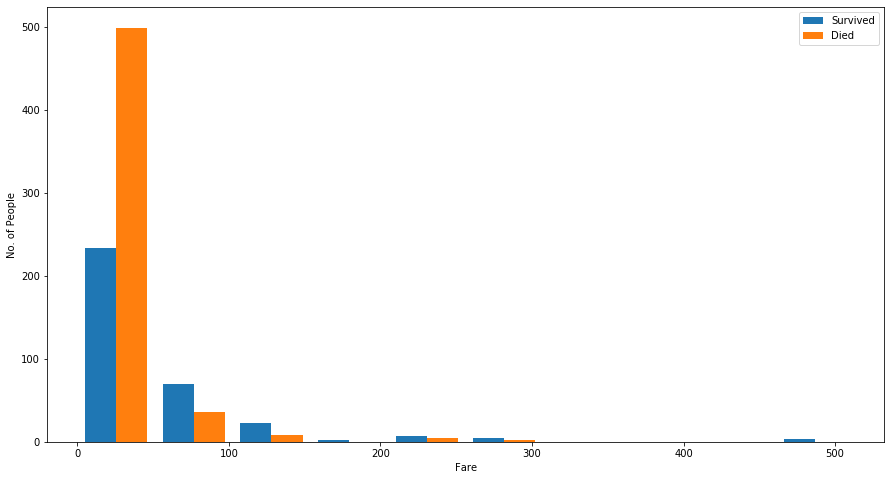

In [18]:
figure = plt.figure(figsize=(15,8))
plt.hist([train_data[train_data['Survived']==1]['Fare'],train_data[train_data['Survived']==0]['Fare']],bins=10,label=['Survived','Died'])
plt.xlabel('Fare')
plt.ylabel('No. of People')
plt.legend()

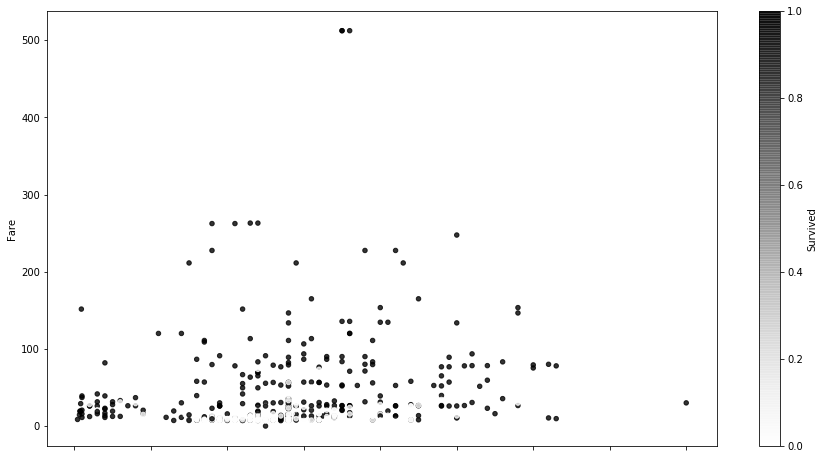

In [40]:
#Age versus Fare
train_data.plot.scatter('Age','Fare',c='Survived',alpha=0.8,figsize=(15,8))

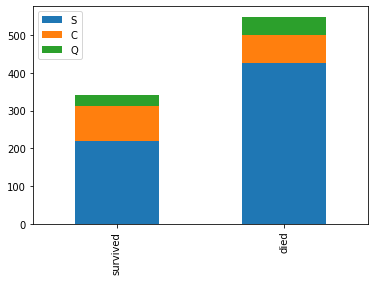

In [20]:
survived_embarkment  = train_data[train_data['Survived']==1]['Embarked'].value_counts()
died_embarkment = train_data[train_data['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embarkment,died_embarkment])
df.index=['survived','died']
df.plot(kind='bar',stacked=True)

Logistic Regression

In [21]:
data_set = train_data[['Pclass','Sex','Age','Fare','SibSp','Cabin']]
one_hot_encoded_training_predictors = pd.get_dummies(data_set)

In [22]:
one_hot_encoded_training_predictors.head()

,Pclass,Age,Fare,SibSp,Sex_female,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_U
0,3,22.0,7.2500,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,26.0,7.9250,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,35.0,8.0500,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
X = one_hot_encoded_training_predictors
y = train_data['Survived']

In [24]:
#dividing the data in training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.65, random_state=1)

In [25]:
logreg = LogisticRegression() #logistic regression using python
logreg.fit(X_train, y_train), 

C:\Users\Rammu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),)

In [26]:
y_pred = logreg.predict(X_test) #predicting the values
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80
